In [40]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import precision_recall_cutoff as prc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-wagner'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "train.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
train = pd.read_csv(file_content_stream, sep = '|')
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [41]:
# Defining the file to be read from s3 bucket
file_key1 = "test.csv"

bucket_object1 = bucket.Object(file_key1)
file_object1 = bucket_object1.get()
file_content_stream1 = file_object1.get('Body')

# Reading the csv file
test = pd.read_csv(file_content_stream1, sep = '|')
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [42]:
#defining variables
X = train.drop(columns = ['fraud'])
Y = train['fraud']
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify = Y)

[Text(643.8461538461538, 856.1700000000001, 'trustLevel <= 1.5\ngini = 0.104\nsamples = 1503\nvalue = [1420, 83]'),
 Text(343.38461538461536, 611.55, 'scannedLineItemsPerSecond <= 0.012\ngini = 0.393\nsamples = 264\nvalue = [193, 71]'),
 Text(171.69230769230768, 366.93000000000006, 'lineItemVoids <= 10.5\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(85.84615384615384, 122.30999999999995, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(257.53846153846155, 122.30999999999995, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(515.0769230769231, 366.93000000000006, 'totalScanTimeInSeconds <= 895.0\ngini = 0.482\nsamples = 173\nvalue = [103, 70]'),
 Text(429.23076923076917, 122.30999999999995, 'gini = 0.346\nsamples = 108\nvalue = [84, 24]'),
 Text(600.9230769230769, 122.30999999999995, 'gini = 0.414\nsamples = 65\nvalue = [19, 46]'),
 Text(944.3076923076923, 611.55, 'trustLevel <= 2.5\ngini = 0.019\nsamples = 1239\nvalue = [1227, 12]'),
 Text(858.4615384615383, 366.9300000000

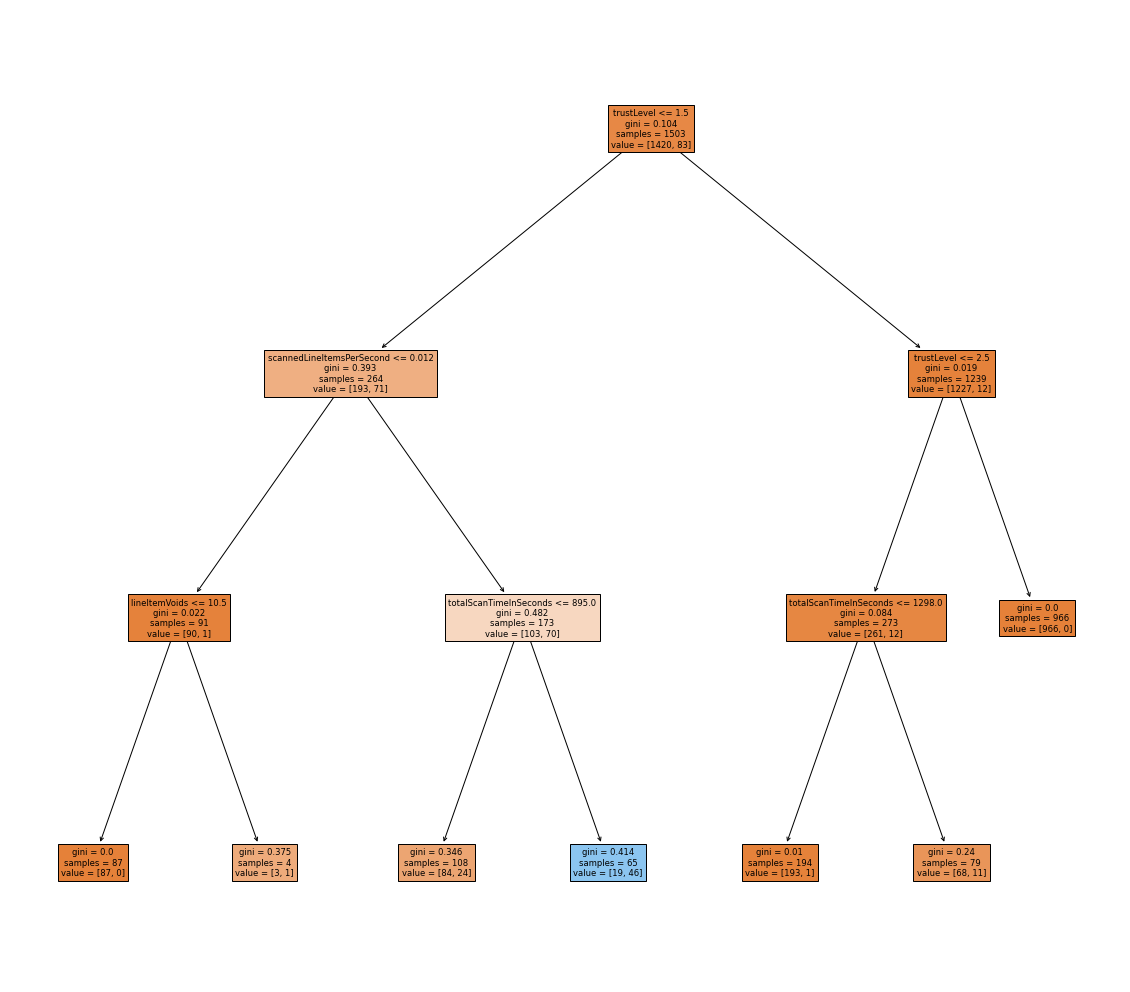

In [43]:
#Building model for decision tree
md1 = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

#Visualizing model
fig = plt.figure(figsize = (20, 18))
plot_tree(md1, feature_names = X_train.columns, filled = True)

In [44]:
#Creating features for training
train['Interaction_1'] = np.where((train['trustLevel'] <= 1.5) & (train['scannedLineItemsPerSecond'] <= 0.012) & (train['lineItemVoids'] <= 10.5), 1, 0)
train['Interaction_2'] = np.where((train['trustLevel'] <= 1.5) & (train['scannedLineItemsPerSecond'] <= 0.012) & (train['lineItemVoids'] >= 10.5), 1, 0)
train['Interaction_3'] = np.where((train['trustLevel'] <= 1.5) & (train['scannedLineItemsPerSecond'] >= 0.012) & (train['totalScanTimeInSeconds'] <= 895.0), 1, 0)
train['Interaction_4'] = np.where((train['trustLevel'] <= 1.5) & (train['scannedLineItemsPerSecond'] >= 0.012) & (train['totalScanTimeInSeconds'] >= 895.0), 1, 0)
train['Interaction_5'] = np.where((train['trustLevel'] >= 1.5) & (train['trustLevel'] <= 2.5) & (train['totalScanTimeInSeconds'] <= 1298.0), 1, 0)
train['Interaction_6'] = np.where((train['trustLevel'] >= 1.5) & (train['trustLevel'] <= 2.5) & (train['totalScanTimeInSeconds'] >= 1298.0), 1, 0)
train['Interaction_7'] = np.where((train['trustLevel'] >= 1.5) & (train['trustLevel'] >= 2.5), 1, 0)


In [45]:
#Creating features for test
test['Interaction_1'] = np.where((test['trustLevel'] <= 1.5) & (test['scannedLineItemsPerSecond'] <= 0.012) & (test['lineItemVoids'] <= 10.5), 1, 0)
test['Interaction_2'] = np.where((test['trustLevel'] <= 1.5) & (test['scannedLineItemsPerSecond'] <= 0.012) & (test['lineItemVoids'] >= 10.5), 1, 0)
test['Interaction_3'] = np.where((test['trustLevel'] <= 1.5) & (test['scannedLineItemsPerSecond'] >= 0.012) & (test['totalScanTimeInSeconds'] <= 895.0), 1, 0)
test['Interaction_4'] = np.where((test['trustLevel'] <= 1.5) & (test['scannedLineItemsPerSecond'] >= 0.012) & (test['totalScanTimeInSeconds'] >= 895.0), 1, 0)
test['Interaction_5'] = np.where((test['trustLevel'] >= 1.5) & (test['trustLevel'] <= 2.5) & (test['totalScanTimeInSeconds'] <= 1298.0), 1, 0)
test['Interaction_6'] = np.where((test['trustLevel'] >= 1.5) & (test['trustLevel'] <= 2.5) & (test['totalScanTimeInSeconds'] >= 1298.0), 1, 0)
test['Interaction_7'] = np.where((test['trustLevel'] >= 1.5) & (test['trustLevel'] >= 2.5), 1, 0)



In [46]:
#defining variables to run random forrest model with interactions
X = train.drop(columns = ['fraud'])
Y = train['fraud']
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify = Y)

In [47]:
#Building random forest model  
RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)

#Predicting test
RF_pred = RF.predict_proba(X_test)[:, 1]

#Predicting labels
RF_labels =prc.precision_recall_cutoff(Y_test, RF_pred)

#Computing classification report
print(classification_report(Y_test, RF_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       355
           1       0.71      0.71      0.71        21

    accuracy                           0.97       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.97      0.97      0.97       376



In [48]:
#Dropping interactions and creating model
X_train = X_train.drop(columns = ['Interaction_1', 'Interaction_2', 'Interaction_3', 'Interaction_4', 'Interaction_5', 'Interaction_6', 'Interaction_7'])
X_test = X_test.drop(columns = ['Interaction_1', 'Interaction_2', 'Interaction_3', 'Interaction_4', 'Interaction_5', 'Interaction_6', 'Interaction_7'])

#Building model
RF1 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)

#Predicting test
RF_pred1 = RF1.predict_proba(X_test)[:, 1]

#Predicting labels
RF_labels1 =prc.precision_recall_cutoff(Y_test, RF_pred1)

#Computing classification report
print(classification_report(Y_test, RF_labels1))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       355
           1       0.59      0.90      0.72        21

    accuracy                           0.96       376
   macro avg       0.79      0.93      0.85       376
weighted avg       0.97      0.96      0.96       376



In [ ]:
#Model with the interactions is slightly more accurate but further testing is likely to be needed